In [1]:
import pandas as pd
import sqlite3

In [2]:
xls1 = pd.ExcelFile('alisultanova.xlsx')
ali = pd.read_excel(xls1, 'all')

In [3]:
xls2 = pd.ExcelFile('sulejmanov.xlsx')
sul_nouns = pd.read_excel(xls2, 'nouns')
sul_verbs = pd.read_excel(xls2, 'verbs')
sul_other = pd.read_excel(xls2, 'other')

In [4]:
# Я работаю над словарём андийского языка. 
# Есть старые лексикографические диссертации (Алисултанова) и (Сулейманов), которые я перевожу в вид таблиц. 
# Для (Алисултанова) это 1 таблица, а для (Сулейманов) 3 - для глаголов, существительных и всего остального 
# (т.к. нужны разные типы форм для сущ. и глаголов, соответственно набор столбцов разный). 
# Слова в таблицах из (Алисултанова) и (Сулейманов) могут совпадать.

In [102]:
conn = sqlite3.connect('andi_dict.db')

In [103]:
c = conn.cursor()

In [50]:
# Создаю таблицу на основе работы (Алисултанова), вношу в неё данные
c.execute("DROP TABLE IF EXISTS ali")
c.execute("CREATE TABLE IF NOT EXISTS ali(слово text, перевод text, примеры text, комментарии text, источник text)")
for i, row in ali.iterrows():
    c.execute("INSERT INTO ali VALUES (?, ?, ?, ?, ?)", (row["слово"], row["перевод"], row["примеры"], row["комментарии"], row["источник"]))

In [110]:
# Смотрю, получилось ли
c.execute('SELECT * FROM ali')
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())


('(ц1а) рик1уду', 'гореть', None, None, 'Алисултанова 2009')
('t1игъгъу', 'крошечный', None, None, 'Алисултанова 2009; 2010')
('аба', 'широкий халат, плащ', None, 'араб.', 'Алисултанова 2009')
('абада', 'нареч. никогда, ни за что, ни при каких обстоятельствах', None, None, 'Алисултанова 2009; 2010')
('абахор ', 'опухоль', None, None, 'Алисултанова 2009')
('аббареги', 'изгой, беглец, чужак, отверженный', None, 'перс.', 'Алисултанова 2009; 2010')
('аббарегилъир', 'проживание (странствие) в чужом краю', None, 'авар.', 'Алисултанова 2009')
('аббасси ', 'монета в 20 копеек', None, 'перс.', 'Алисултанова 2009')
('абдал', 'дурной, глупый, сумасшедший', None, 'авар. < араб. ', 'Алисултанова 2009; 2010')
('абдаллъир', 'глупость, безумие', None, 'авар.', 'Алисултанова 2009')
('абжаб', 'начатый', None, None, 'Алисултанова 2009; 2010')
('абжаб', 'смешанный', None, None, 'Алисултанова 2009; 2010')


In [54]:
# Создаю таблицу с существительными на основе работы (Сулейманов), вношу в неё данные
c.execute("DROP TABLE IF EXISTS sul_nouns")
c.execute("CREATE TABLE IF NOT EXISTS sul_nouns(страница text, слово text, перевод text, класс text, pl text, obl text, пример text, комментарий text)")
for i, row in sul_nouns.iterrows():
    c.execute("INSERT INTO sul_nouns VALUES (?, ?, ?, ?, ?, ?, ?, ?)", (row["страница"], row["слово"], row["перевод"], row["класс"], row["pl"], row["obl"], row["пример"], row["комментарий"]))

In [55]:
# Создаю таблицы с глаголами и всем остальным на основе работы (Сулейманов), вношу в них данные
c.execute("DROP TABLE IF EXISTS sul_verbs")
c.execute("CREATE TABLE IF NOT EXISTS sul_verbs(страница text, слово text, перевод text, prs text, pst text, пример text, комментарий text)")
for i, row in sul_verbs.iterrows():
    c.execute("INSERT INTO sul_verbs VALUES (?, ?, ?, ?, ?, ?, ?)", (row["страница"], row["слово"], row["перевод"], row["prs"], row["pst"], row["пример"], row["комментарий"]))
c.execute("DROP TABLE IF EXISTS sul_other")
c.execute("CREATE TABLE IF NOT EXISTS sul_other(страница text, слово text, перевод text, пример text, комментарий text)")
for i, row in sul_other.iterrows():
    c.execute("INSERT INTO sul_other VALUES (?, ?, ?, ?, ?)", (row["страница"], row["слово"], row["перевод"], row["пример"], row["комментарий"]))

In [56]:
conn.commit()

In [11]:
# Можно добавлять новые вхождения из источников
#c.execute("INSERT INTO ali VALUES ('пример','пример', 'пример с примером', 'это только для примера', 'из головы')")

In [113]:
# Можно сортировать по странице в источнике 
c.execute('SELECT * FROM sul_nouns ORDER BY страница')
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())

('100, 149', 'рокъир', 'мир, перемирие', 'III', None, None, None, None)
('100, 152', 'гьанарокьи', 'ласка', 'IV', None, None, None, None)
('102', 'буц1ц1ир', 'скот, имущество', None, None, None, None, None)
('102', 'къуну', 'увула', None, None, None, None, None)
('102, 139', 'ц1ц1уку', 'мех, шкура', 'III', None, None, None, None)
('103', 'аблълъинлъир', 'сходство', None, None, None, None, None)
('103', 'инкубатур', 'инкубатор', None, None, None, None, None)
('103', 'инспектур', 'инспектор', None, None, None, None, None)
('103', 'лектур', 'лектор', None, None, None, None, None)


In [118]:
# Можно сортировать по алфавиту (и в обратном порядке, заменив ASC на DESC)
c.execute('SELECT * FROM sul_nouns ORDER BY слово ASC')
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())
print(c.fetchone())

('171', '(исивл1) рохъ', 'ребро', None, '(исивл1) рохъол', None, None, None)
('147, 171', '(масуй) чарухъ', '(сафьяновая) галоша', 'III', '(масвол) чарухъол', None, None, None)
('154', '(мйаъарул1) л1уол1а', 'мозг (головной)', 'V', None, None, None, None)
('154', '(моч1ищур) гьакъу', 'матка', 'V', '(моч1иллур) гьакъойл (1 кл.), моч1иллил1 гьакъойл (2 кл.)', None, None, None)
('98', '*овхх', 'баюканье', None, None, None, None, None)
('55', 'Буцур', 'название горы', None, None, None, None, None)
('43, 160', 'аба', 'плащ (мужской и женский)', 'V', None, None, None, None)
('135', 'аббарег', 'пришелец', 'I/II', None, None, None, None)
('106, 150', 'абжар', 'сложение', 'III', None, None, None, None)
('103', 'аблълъинлъир', 'сходство', None, None, None, None, None)
('133', 'абххазйоллув', 'абхазец', 'I', None, None, None, None)
('134', 'абххазйоллуй', 'абхазка', 'II', None, None, None, None)
('156', 'абчохол', 'помой, месиво (похлебка для скота, обычно для коров)', 'V', None, None, None, None

In [61]:
# Можно показать все существительные I класса (например)
for row in c.execute('SELECT слово FROM sul_nouns WHERE класс = "I"'):
    print(row)

('абххазйоллув',)
('аврег',)
('азирбейжаноллув',)
('аллагь',)
('арабйоллув',)
('ашоллав',)
('багвалов',)
('будалаъ',)
('будун',)
('бутайлум',)
('бутуруллув',)
('ваххдоб',)
('ваццъал',)
('вокьот1иннйа',)
('вокьусси',)
('вокьусси',)
('воцц',)
('вошо // вощо',)
('гуржйоллув',)
('гъагъоррав',)
('гъуннав',)
('гьек1а',)
('дада',)
('даргйоллув',)
('дибир',)
('зилурав',)
('зунурачи',)
('има',)
('имакьеру',)
('имам',)
('инххиллав',)
('ихум',)
('кашиш',)
('коххирав',)
('кунт1а',)
('къади',)
('къаличи',)
('къгъваннав',)
('лезгйоллув',)
('малайк',)
('меннав',)
('нартоллув',)
('нугъаллув',)
('нусо',)
('оруссиррав',)
('рик1к1унарав',)
('табасараноллув',)
('турколлув',)
('украйноллув',)
('хунчч',)
('хьиндалоллув',)
('ц1ц1унн*арав',)
('ч1амалав',)
('чохъурав',)
('эрменйоллув',)


In [62]:
#Можно найти слова, содержащие определённую последовательность символов
for row in c.execute('SELECT * FROM sul_nouns WHERE слово LIKE "%аб%"'):
    print(row)

('43, 160', 'аба', 'плащ (мужской и женский)', 'V', None, None, None, None)
('135', 'аббарег', 'пришелец', 'I/II', None, None, None, None)
('106, 150', 'абжар', 'сложение', 'III', None, None, None, None)
('103', 'аблълъинлъир', 'сходство', None, None, None, None, None)
('133', 'абххазйоллув', 'абхазец', 'I', None, None, None, None)
('134', 'абххазйоллуй', 'абхазка', 'II', None, None, None, None)
('156', 'абчохол', 'помой, месиво (похлебка для скота, обычно для коров)', 'V', None, None, None, None)
('149', 'адаб', 'уважение', 'III', None, None, None, None)
('150', 'азаб', 'мучение', 'III', None, None, None, None)
('34, 88, 153', 'акъраб', 'скорпион', 'IV', 'акърайл', None, None, 'чан., зил. мн. ч. акърабил')
('133', 'арабйоллув', 'араб', 'I', None, None, None, None)
('134', 'арабйоллуй', 'арабка', 'II', None, None, None, None)
('134', 'баба', 'мама', 'II', None, None, None, None)
('48, 152, 170', 'бабущ', 'утка', 'IV', 'бабущол', None, None, None)
('44', 'вабаъ', 'холера', None, None, N

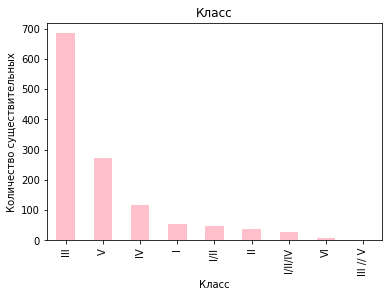

In [66]:
# График показывает распределение по классам существительных андийского языка, взятых из дисс. (Сулейманов).
import matplotlib.pyplot as plt
sul_nouns['класс'].value_counts().plot.bar(color='pink');
plt.title('Класс')
plt.xlabel('Класс')
plt.ylabel('Количество существительных');
# Большая часть существительных в таблице принадлежит 3 классу. Следующие по размеру группы - 4 и 5 класс. 3, 4, 5 класс отвечают за неживые предметы. Существительные 1 и 2 класса, обозначающие людей, составляют относительно небольшую часть существительных. 
# Однако, эти выводы трудно экстраполировать на весь андийский язык. Во-первых, не факт, что слова, упомянутые в диссертации, распределены по классам в таком же соотношении как в языке в целом. Во-вторых, ещё не все данные внесены в таблицу. 
#I/II класс - это существительные, обозначающие людей в целом (мужчину или женщину - зависит от контекста). I/II/IV - класс также зависит от контекста. III // V - в разных местах диссертации автор указывает разные классы для 1 слова. Это не вариативность, а скорее всего ошибка.

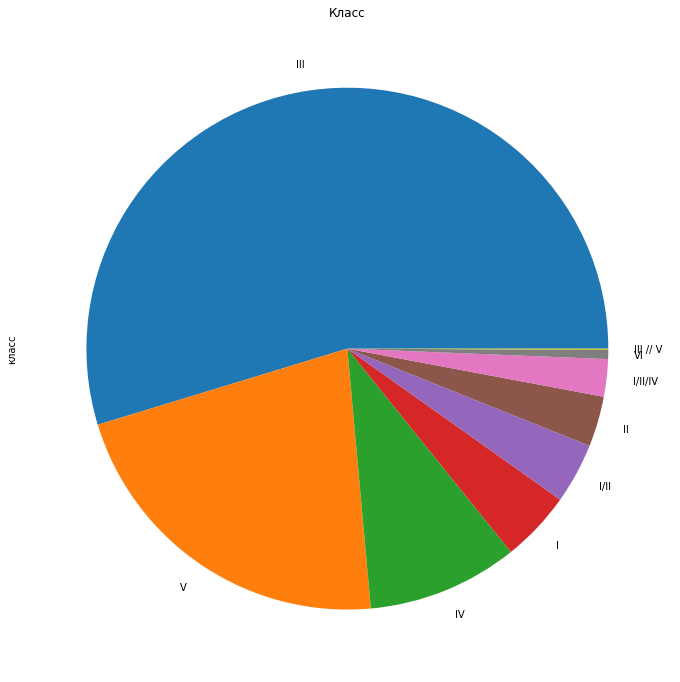

In [69]:
# То же самое, но в виде пайчарта. 
# Возможно, на этой картинке более наглядно видно соотношение, однако я считаю предыдущий график более уместным, так как он показывает ещё и абсолютное число вхождений существительных каждого класса в таблицу.
plt.figure(figsize=(12, 12))
sul_nouns['класс'].value_counts().plot(kind='pie');
plt.title('Класс');

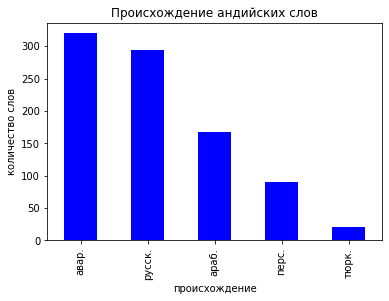

In [85]:
# В диссертации (Алисултанова) автор даёт информацию о происхождении андийских слов. Эта информация находится в моей таблице в стобце "комментарии".
# Из столбца "комментарии" я выбираю информацию о том, откуда заимствовано то или иное слово, если она есть. (На самом деле, там есть ещё комментарии вида "заимствовано из арабского через аварский", но я не стала учитывать их в этом графике для простоты картинки) 
# График показывает, что аварских и русских заимствований в андийском языке больше всего, что логично с точки зрения социолингвистической ситуации в андийских сёлах.
# Далее идут арабские, персидские и тюркские заимствования. 
# Однако все эти результаты, как я уже писала выше, весьма предварительные.
borr = ali[ali.комментарии.isin(('авар.', 'русск.', 'араб.', 'перс.', 'тюрк.'))]
borr['комментарии'].value_counts().plot.bar(color='blue'); 
plt.title('Происхождение андийских слов')
plt.xlabel('происхождение')
plt.ylabel('количество слов');

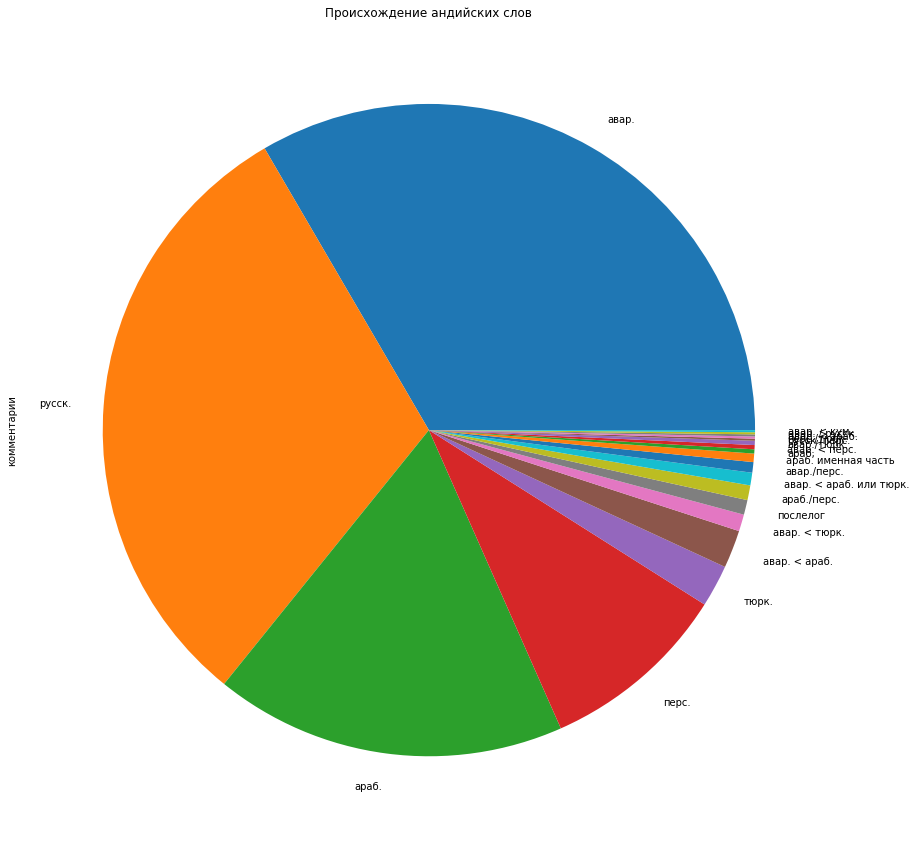

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


         страница                                              слово перевод  \
132  51, 139, 167  бехмугъул // мехмугъул // беххмугъол // меххму...  курдюк   

    класс                            pl  obl пример комментарий  length  
132   III  беххмугъолол // меххмугъолол  NaN    NaN         NaN      50  


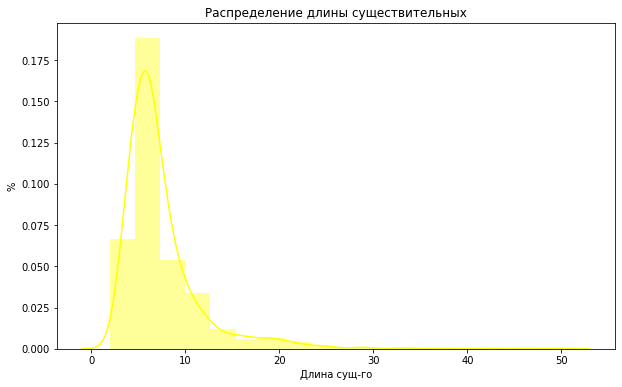

In [97]:
# Построим график распределения длины андийских существительных. Одна переменная => подходит гистограмма.
import seaborn as sns
sul_nouns['length'] = sul_nouns['слово'].apply(len)
plt.figure(figsize=(10, 6))
sns.distplot(sul_nouns['length'], bins=18, color='yellow')
plt.title('Распределение длины существительных')
plt.ylabel('%')
plt.xlabel('Длина сущ-го');
# Но что это за слово из 50 символов?
print(sul_nouns[sul_nouns['length']==50])
# А это просто в одной ячейке перечислено много вариантов одного слова, встреченных в диссертации.
# И такое встречается в таблице регулярно, поэтому выводы никакие на этих данных лучше не делать.

TypeError: object of type 'float' has no len()

In [119]:
conn.commit()
conn.close()